In [1]:
# Predice en test dataset todos los boxes, labels, y scores.

In [1]:
from __future__ import absolute_import, division, print_function
import os

PREF = '001a01a' 
KAGGLE = 'KAGGLE_WORKING_DIR' in os.environ
COLAB = 'COLAB_GPU' in os.environ

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from multiprocessing import Pool, cpu_count
import tensorflow as tf
from keras import backend as K
import keras
from PIL import Image
from PIL import ImageOps
import cv2

import time

kernel_time = time.time()

def tic_tac(restart):
    global kernel_time 
    
    if restart:
        kernel_time = time.time()
    else:
        t_sec = round(time.time() - kernel_time)
        (t_min, t_sec) = divmod(t_sec,60)
        (t_hour,t_min) = divmod(t_min,60) 
        print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))
    return

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
    tf.set_random_seed(seed)

tic_tac(True)
PREF

Using TensorFlow backend.


'001a01a'

In [2]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')

In [3]:
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# from PIL import Image, ImageDraw, ImageFont, ImageOps
# fontsize = 50

# # From https://www.google.com/get/noto/
# !wget -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
# !unzip -p NotoSansCJKjp-hinted.zip NotoSansCJKjp-Regular.otf > NotoSansCJKjp-Regular.otf
# !rm NotoSansCJKjp-hinted.zip

# font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

In [5]:
# !ls 

In [6]:
# !unzip darknet-master.zip


In [7]:
import os

if COLAB:
    os.chdir('/content/gdrive/My Drive/kuzushiji-recognition/keras-retinanet-master/')

In [8]:
import sys 
import os
sys.path.append('.')

In [9]:
!pip install --upgrade git+https://github.com/broadinstitute/keras-resnet
import keras
import keras_resnet

  Cloning https://github.com/broadinstitute/keras-resnet to /tmp/pip-req-build-x80e0k9g
  Running command git clone -q https://github.com/broadinstitute/keras-resnet /tmp/pip-req-build-x80e0k9g
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=22143 sha256=55dfa63c1c329630b5305dc07d60326633d4a428a8fb4960038b6bd63826009e
  Stored in directory: /tmp/pip-ephem-wheel-cache-zj6ykcn_/wheels/10/52/f3/6a1fdbfb022ce9abfdf00a1ca7e90cef71dea99976edbcb53f
Successfully built keras-resnet
  Found existing installation: keras-resnet 0.2.0
    Uninstalling keras-resnet-0.2.0:
      Successfully uninstalled keras-resnet-0.2.0
  Rolling back uninstall of keras-resnet
  Moving to /home/maxim/.local/lib/python3.5/site-packages/keras_resnet-0.2.0.dist-info/
   from /home/maxim/.local/lib/python3.5/site-packages/~eras_resnet-0.2.0.dist-info
  Moving to /home/maxim/.local/lib/python3.5/site-packages/keras_resnet/
   from /home/maxim/.local/lib/python3.5/site-packages/~er

In [10]:
import argparse
import os
import sys
import warnings

import keras
import keras.preprocessing.image
import tensorflow as tf

# Allow relative imports when being executed as script.
# if __name__ == "__main__" and __package__ is None:
#     sys.path.insert(0, os.path.join(os.path.dirname(__file__), '..', '..'))
#     import keras_retinanet.bin  # noqa: F401
#     __package__ = "keras_retinanet.bin"

# Change these to absolute imports if you copy this script outside the keras_retinanet package.
import keras_retinanet.layers   # noqa: F401
import keras_retinanet.losses
import keras_retinanet.models as models
from keras_retinanet.callbacks import RedirectModel
from keras_retinanet.callbacks.eval import Evaluate
from keras_retinanet.models.retinanet import retinanet_bbox
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.preprocessing.kitti import KittiGenerator
from keras_retinanet.preprocessing.open_images import OpenImagesGenerator
from keras_retinanet.preprocessing.pascal_voc import PascalVocGenerator
from keras_retinanet.utils.anchors import make_shapes_callback
from keras_retinanet.utils.config import read_config_file, parse_anchor_parameters
from keras_retinanet.utils.keras_version import check_keras_version
from keras_retinanet.utils.model import freeze as freeze_model
from keras_retinanet.utils.transform import random_transform_generator
from keras_retinanet.utils.image import random_visual_effect_generator


In [ ]:
# convert the model weights.

In [12]:
os.system('python ./convert_model.py ../../snapshots/resnet50_cvs_01_hat.h5 ../../converted_models/resnet50_cvs_01_hat.h5')

256

In [16]:
!pwd

/home/maxim/Documents/keras-retinanet-master


In [17]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('.', 'converted_models', 'resnet50_cvs_01_hat.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

W0924 11:16:13.717316 140450904475392 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 11:16:13.777006 140450904475392 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0924 11:16:13.873497 140450904475392 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 11:16:13.894543 140450904475392 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0924 11:16:13.

In [69]:
# load train dataset
TRAIN_DIR='../kuzushiji-recognition/input/kuzushiji-recognition/'

df_train=pd.read_csv(TRAIN_DIR + 'train.csv')
unicode_map = {codepoint: char for codepoint, char in pd.read_csv(TRAIN_DIR+'unicode_translation.csv').values}
df_train=df_train.dropna(axis=0, how='any')#you can use nan data(page with no letter)
df_train=df_train.reset_index(drop=True)
df_train.head() # En el nombre del archivo esta separado el libro_pagina_x x=1 es derecha, x=2 es izq. x=1 y x=2 tiene el mismo "fondo".


,image_id,labels
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2,100241706_00005_2,U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...


In [40]:
!ls data/kuzushiji-recognition/images/100241706_00005_1.jpg

data/kuzushiji-recognition/images/100241706_00005_1.jpg


In [84]:
def predict_to_label(image_path, model):
    # load image
    image = read_image_bgr(image_path)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # compose label
    label = ''
    for box, score, pred_label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        try:
            label += labels_to_names[pred_label] + ' '
        except:
            print(labels_to_names[label])
        b = box.astype(int)
        label += '{} {} {} {} '.format(str(b[0]),str(b[1]),str(b[2]-b[0]),str(b[3]-b[1]))

    if len(label)>4:
        label = label[:-1]
        
    return label


In [85]:
predict_to_label('data/kuzushiji-recognition/images/100241706_00005_1.jpg', model)

'. 1688 2959 162 151 . 378 944 196 151 . 1397 1141 150 177 . 413 1170 152 150 . 2009 1159 166 160 . 1666 2524 195 160 . 1684 2742 160 154 . 744 1735 139 224 . 748 1459 138 223 . 439 1377 108 206 . 1049 2606 171 189 . 1684 3171 151 149 . 466 2840 92 245 . 449 3087 159 149 . 1698 1363 136 137 . 2044 943 127 122 . 1079 3047 122 155 . 1063 3367 164 160 . 420 2186 147 183 . 1068 2875 139 105 . 768 2038 118 187 . 1049 1148 176 165 . 1706 890 144 192 . 388 1985 207 199 . 1994 1736 190 135 . 1041 2148 150 212 . 1398 2202 135 185 . 2027 2237 96 150 . 722 947 150 140 . 1403 2438 119 168 . 1401 1961 114 228 . 744 3030 132 145 . 742 2681 141 128 . 1711 1570 134 73 . 1367 1381 172 188 . 1710 1731 93 134 . 1694 3437 106 119 . 441 1596 102 174 . 2048 2565 80 144 . 450 2552 138 246 . 2008 2083 154 118 . 779 3310 102 174 . 1394 1586 147 229 . 1695 1975 156 108 . 2019 1522 118 130 . 2030 2394 111 147 . 726 2278 180 176 . 1381 2703 137 193 . 2005 3229 148 119 . 1048 937 208 161 . 1736 2288 83 182 . 762 1

processing time:  1.4220476150512695


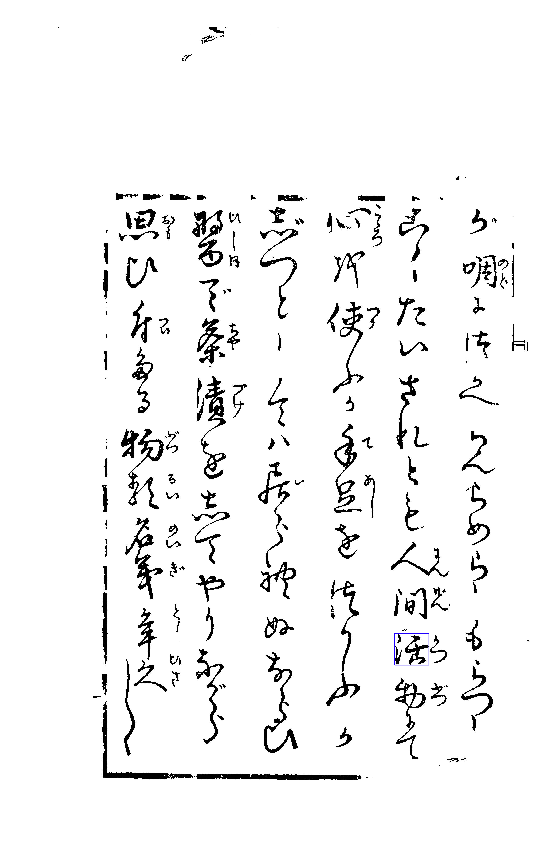

In [86]:
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color


labels_to_names = {0:'.'}

# load image
image = read_image_bgr('data/kuzushiji-recognition/images/100241706_00005_1.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    break
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()


In [87]:
b

array([1688, 2959, 1850, 3110])

In [88]:
boxes, scores, labels

(array([[[ 1.6883605e+03,  2.9590303e+03,  1.8500541e+03,  3.1104822e+03],
         [ 3.7848407e+02,  9.4470001e+02,  5.7461951e+02,  1.0957457e+03],
         [ 1.3972743e+03,  1.1410020e+03,  1.5477297e+03,  1.3182003e+03],
         ...,
         [-2.9900000e+00, -2.9900000e+00, -2.9900000e+00, -2.9900000e+00],
         [-2.9900000e+00, -2.9900000e+00, -2.9900000e+00, -2.9900000e+00],
         [-2.9900000e+00, -2.9900000e+00, -2.9900000e+00, -2.9900000e+00]]],
       dtype=float32),
 array([[ 0.9999999 ,  0.9999988 ,  0.99999744,  0.99999654,  0.9999926 ,
          0.9999797 ,  0.99997795,  0.999977  ,  0.99996734,  0.9999598 ,
          0.99993646,  0.99992657,  0.9999217 ,  0.9998894 ,  0.9998101 ,
          0.999794  ,  0.99976707,  0.9997555 ,  0.99973464,  0.9996819 ,
          0.9996654 ,  0.9995738 ,  0.99952114,  0.9995204 ,  0.99951184,
          0.9993061 ,  0.9991665 ,  0.99825215,  0.9981128 ,  0.99804205,
          0.9978844 ,  0.9977977 ,  0.9977031 ,  0.99748445,  0.996

In [89]:
boxes.shape, scores.shape, labels.shape, image.shape

((1, 300, 4), (1, 300), (1, 300), (1296, 800, 3))

In [90]:
boxes[0,0], scores[0,0], labels[0,0]

(array([1688.3605, 2959.0303, 1850.0541, 3110.4822], dtype=float32),
 0.9999999,
 0)

In [91]:
boxes[0,0]*scale

array([ 564.66907,  989.6422 ,  618.7472 , 1040.295  ], dtype=float32)

In [92]:
from PIL import Image, ImageDraw, ImageFont, ImageOps


# This function takes in a filename of an image, and the labels in the string format given in train.csv, and returns an image containing the bounding boxes
def visualize_training_data_hat(image_fn, labels):
    # Convert annotation string to array
    fontsize = 12
    labels = np.array(labels.split(' ')).reshape(-1, 5)
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x), int(y), int(w), int(h)
        #char = unicode_map[codepoint] # Convert codepoint to actual unicode character
        char = codepoint

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        bbox_draw.line([(x,y),(x+w,y+h),(x+w,y),(x,y+h)], fill=(255, 0, 0), width=4)
        #char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(0, 0, 255, 255), font=font)

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return imsource

In [93]:
def PlotVisualizeKuzushiji(image_file):
    img1, imsource1, rects_hat = VisualizeKuzushiji_hat(image_file)
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.title("Detection of Kuzushiji",fontsize=20)
    plt.imshow(img1)
    plt.subplot(1,2,2)
    plt.title("Ground True of Kuzushiji",fontsize=20)
    #plt.imshow(imsource1)
    fn = image_file.split('/')[-1][:-4]
    label = df_train.loc[df_train['image_id']==fn,'labels'].values[0]
    img = visualize_training_data_hat(image_file, label)    
    plt.imshow(img)
    plt.show()
    
    return rects_hat

def PlotVisualizeKuzushiji(img_true, img_pred):
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.title("Detection of Kuzushiji",fontsize=20)
    plt.imshow(img_pred)
    plt.subplot(1,2,2)
    plt.title("Ground True of Kuzushiji",fontsize=20)
    plt.imshow(img_true)
#     fn = image_file.split('/')[-1][:-4]
#     label = df_train.loc[df_train['image_id']==fn,'labels'].values[0]
#     img = visualize_training_data_hat(image_file, label)    
#     plt.imshow(img)
    plt.show()
    


In [94]:
labels_true = df_train.loc[df_train.image_id=='100241706_00005_1', 'labels'].values[0]

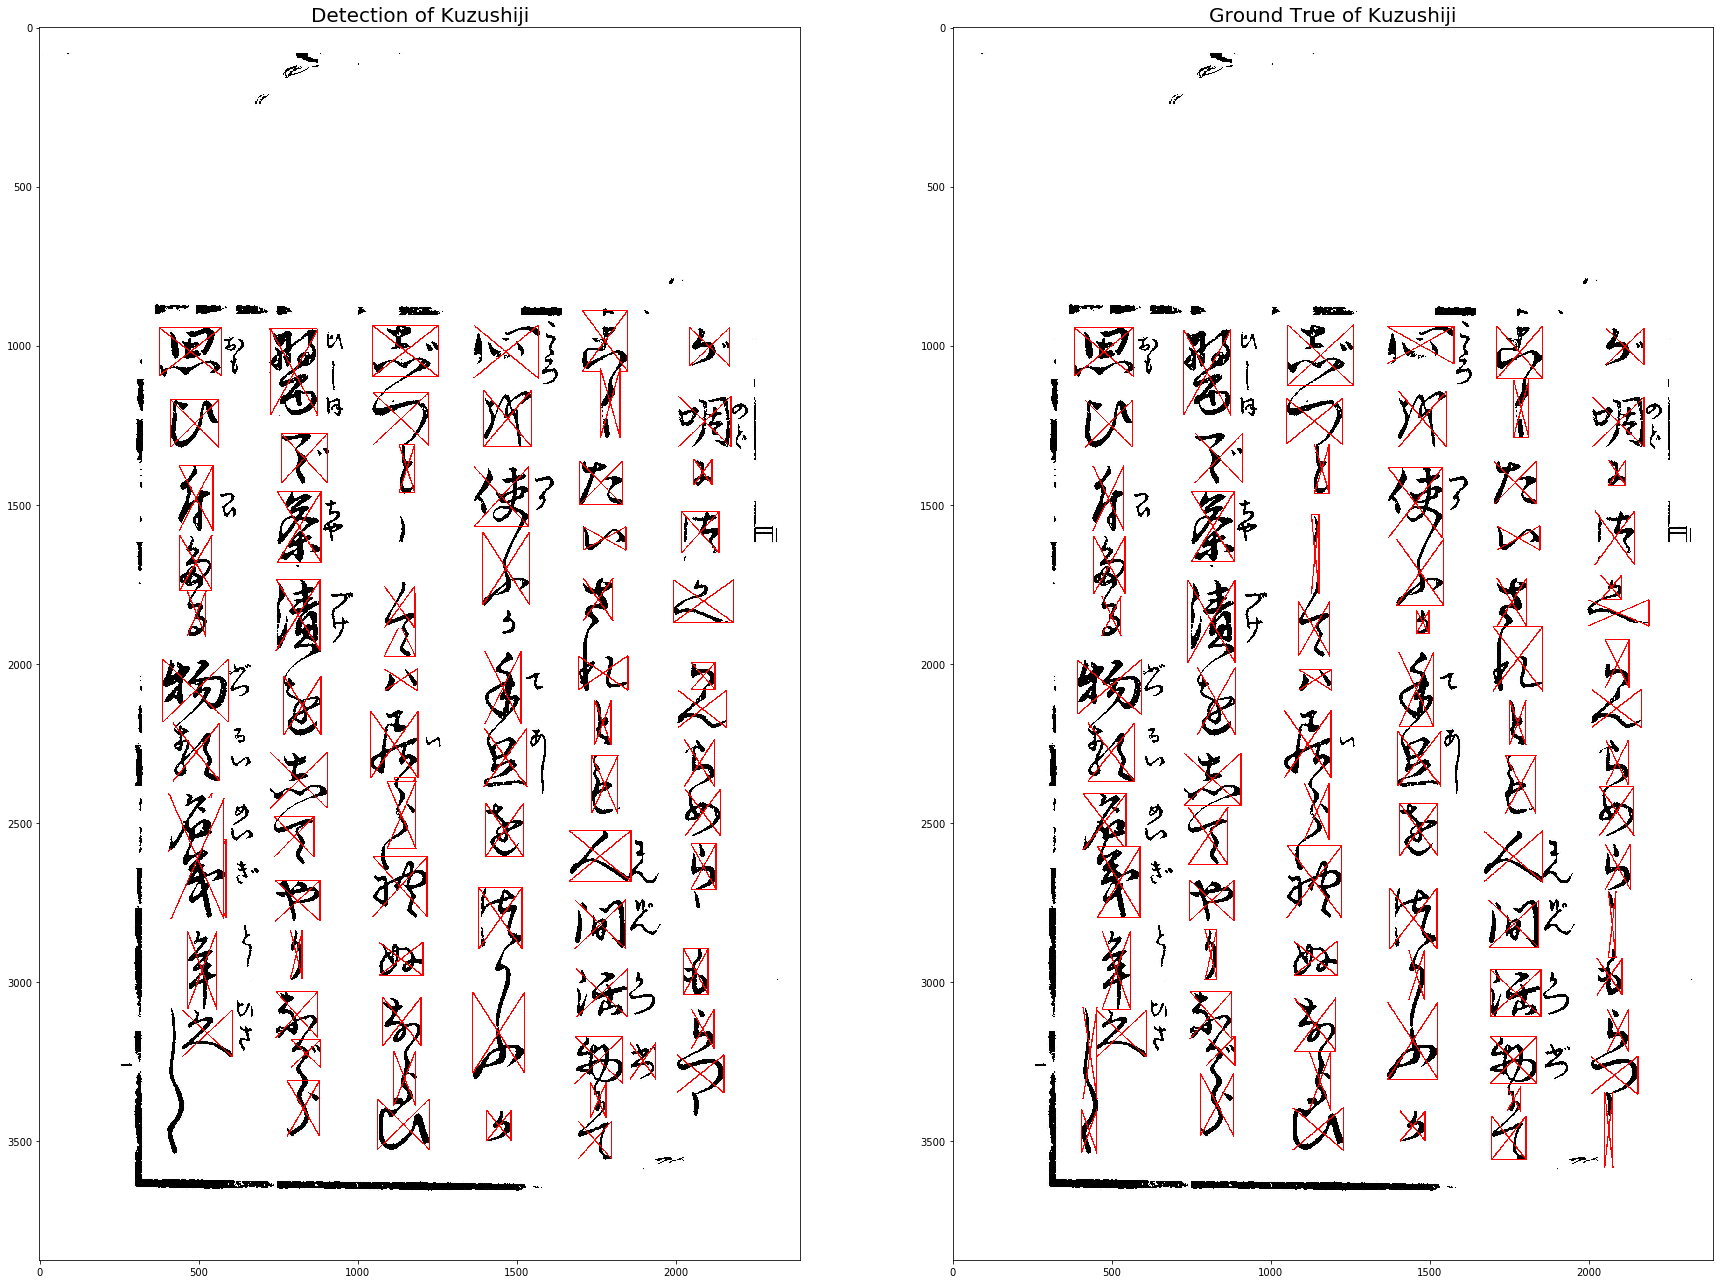

In [95]:
image_path='data/kuzushiji-recognition/images/100241706_00005_1.jpg'

label = predict_to_label(image_path, model)
img_pred = visualize_training_data_hat(image_path, label)
img_true = visualize_training_data_hat(image_path, labels_true)

PlotVisualizeKuzushiji(img_true,img_pred)

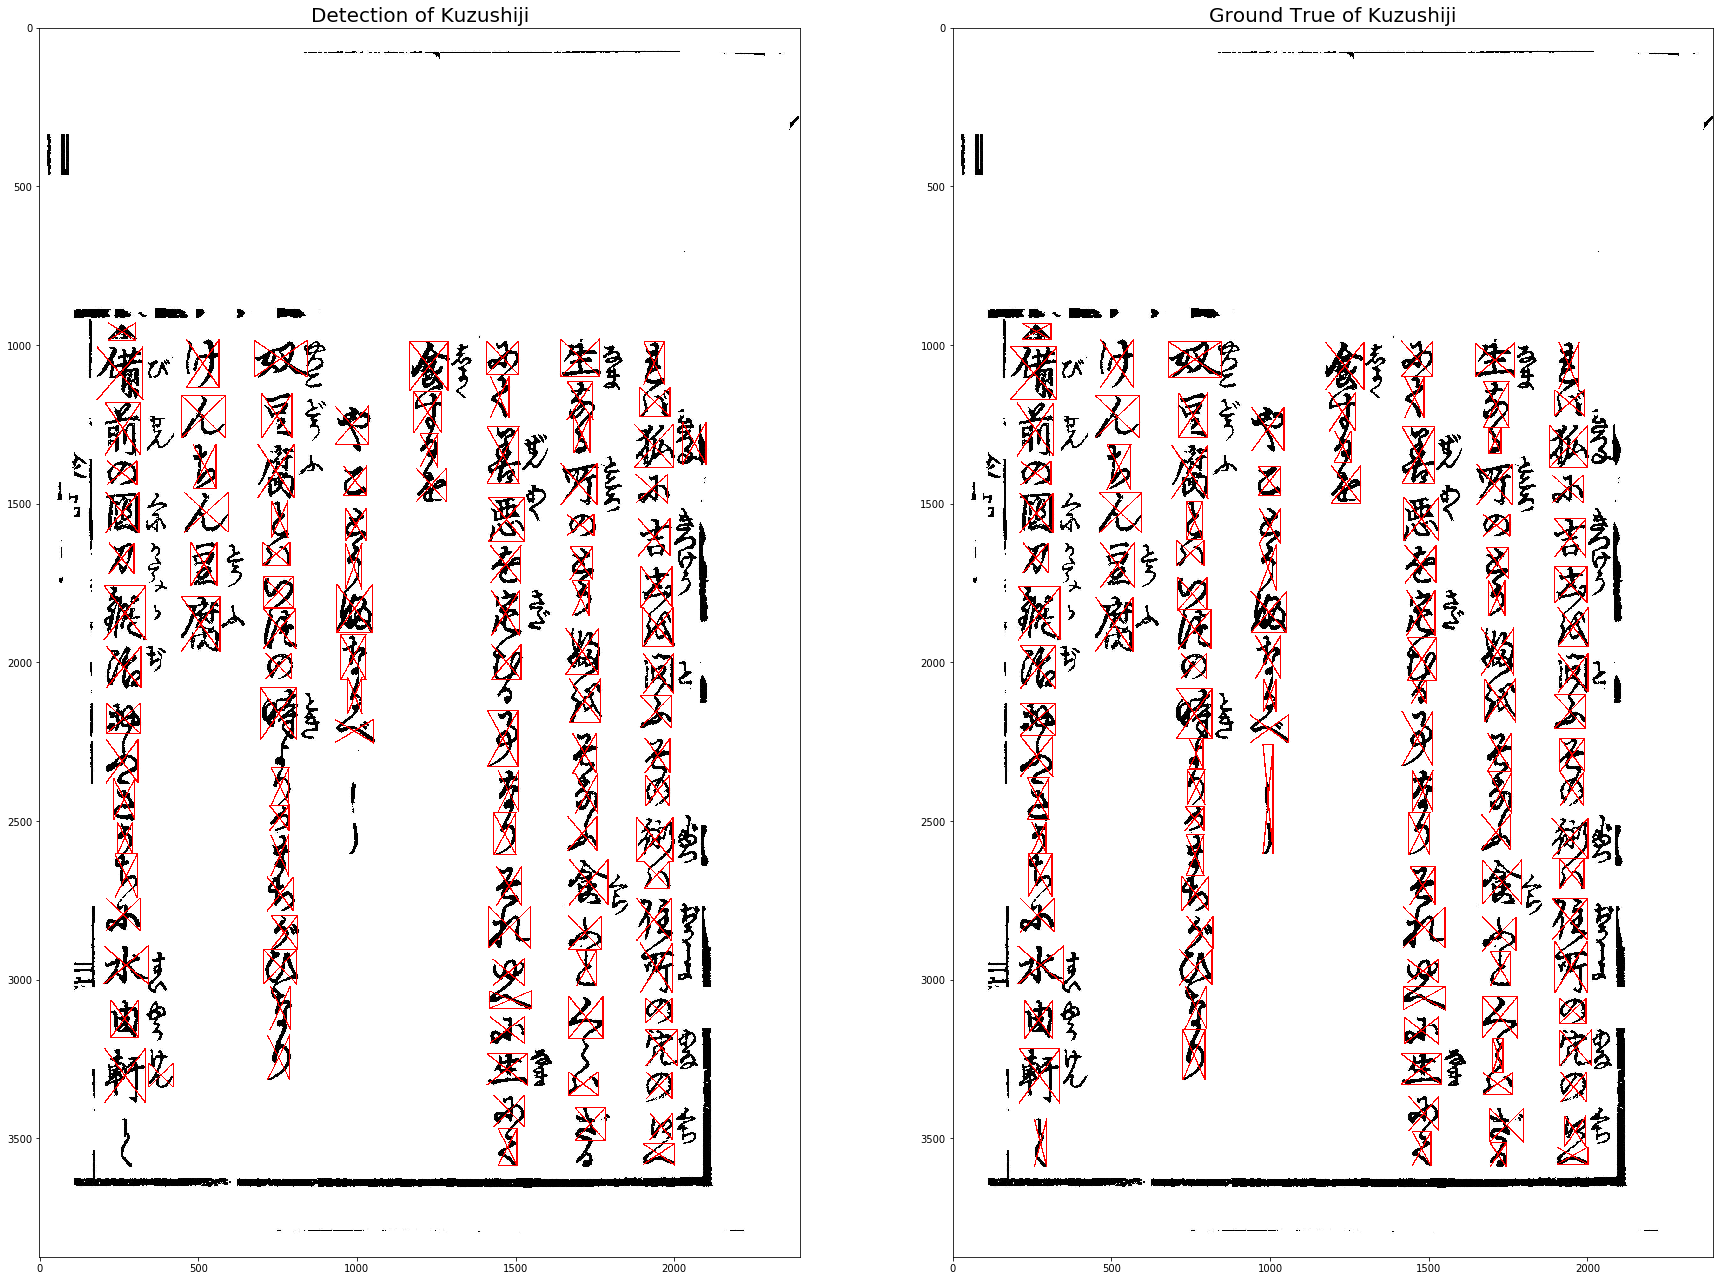

In [96]:
image_path='data/kuzushiji-recognition/images/100241706_00012_2.jpg'

labels_true = df_train.loc[df_train.image_id=='100241706_00012_2', 'labels'].values[0]

label = predict_to_label(image_path, model)
img_pred = visualize_training_data_hat(image_path, label)
img_true = visualize_training_data_hat(image_path, labels_true)

PlotVisualizeKuzushiji(img_true,img_pred)

In [ ]:
TRAIN_DIR='../kuzushiji-recognition/input/kuzushiji-recognition/'


In [81]:
!ls '../kuzushiji-recognition/input/kuzushiji-recognition/train_images/100241706_00012_2.jpg'

../kuzushiji-recognition/input/kuzushiji-recognition/train_images/100241706_00012_2.jpg


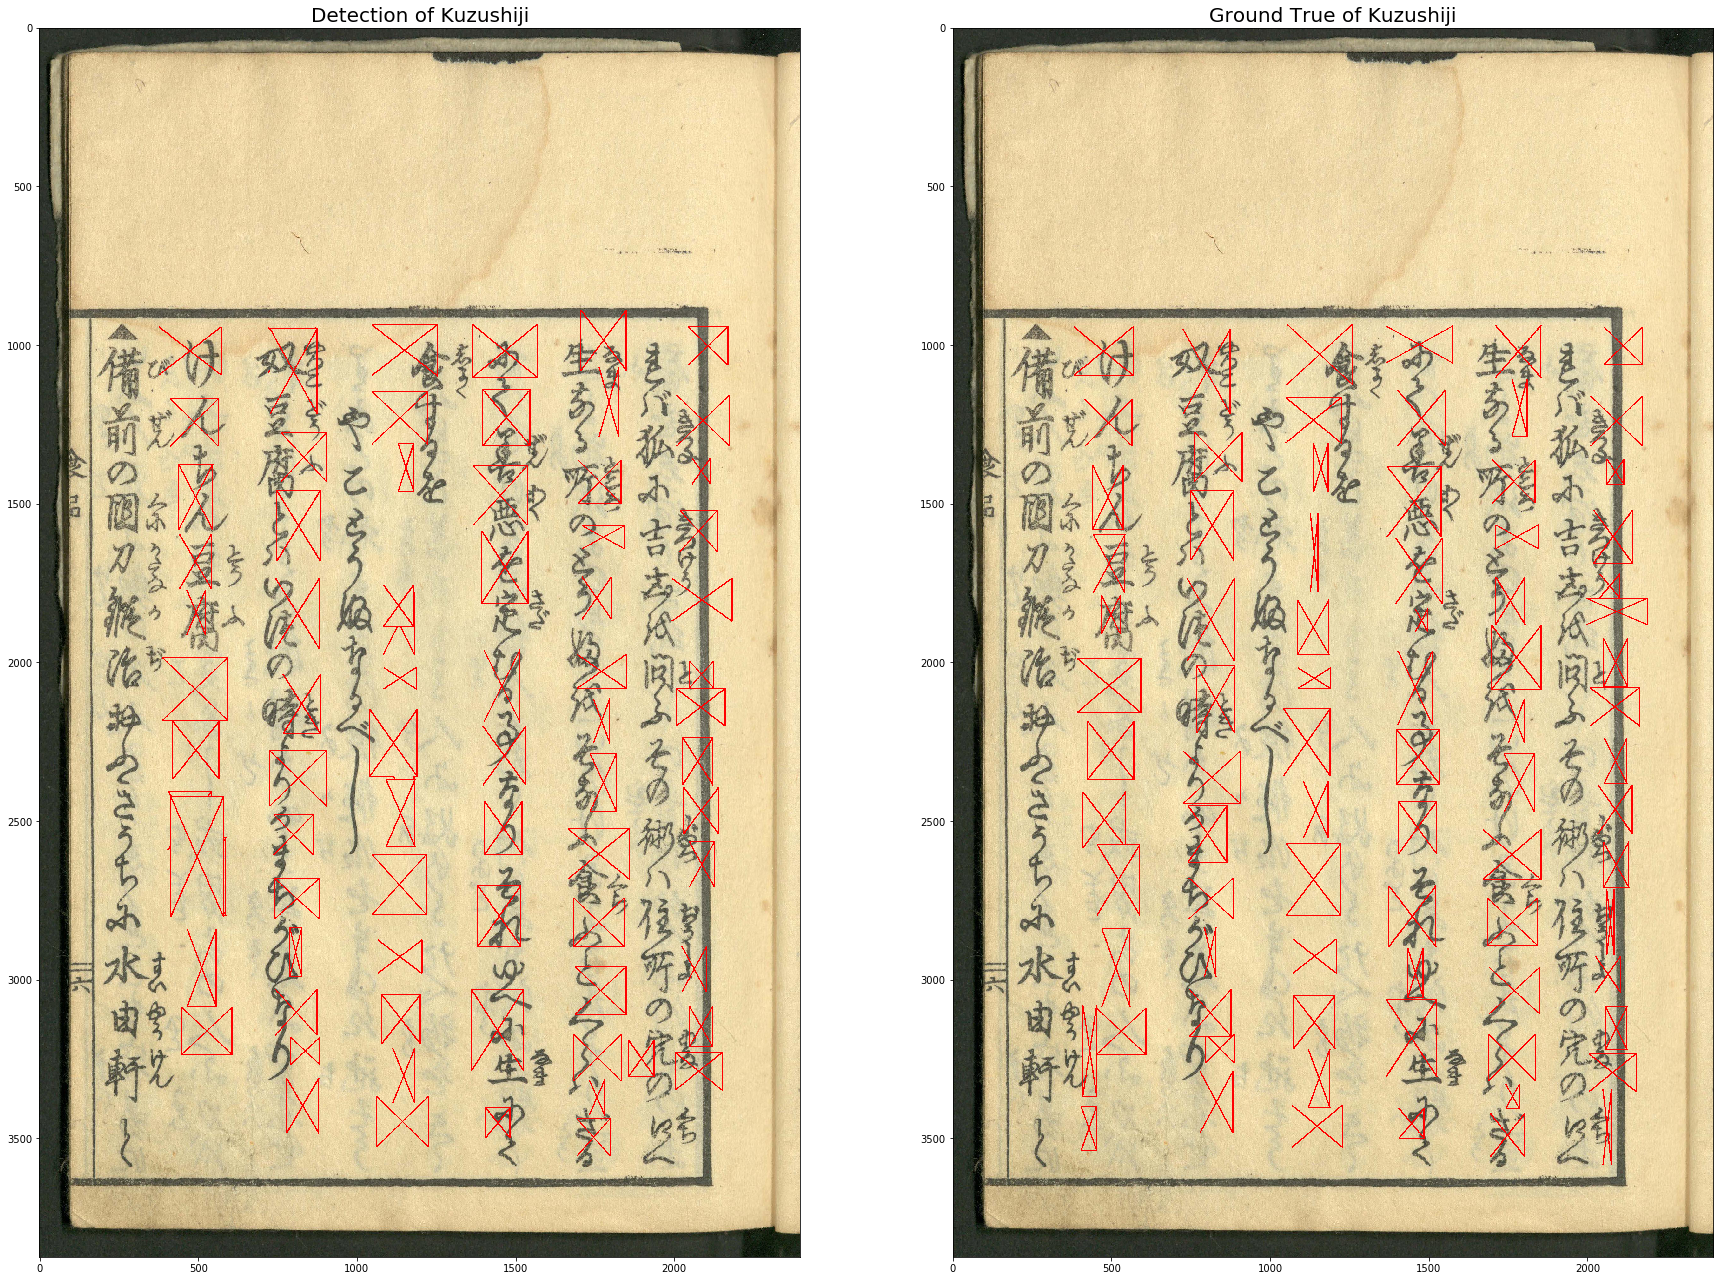

In [82]:
image_path='../kuzushiji-recognition/input/kuzushiji-recognition/train_images/100241706_00012_2.jpg'

label = predict_to_label(image_path, model)
img_pred = visualize_training_data_hat(image_path, label)
img_true = visualize_training_data_hat(image_path, labels_true)

PlotVisualizeKuzushiji(img_true,img_pred)

In [12]:
def makedirs(path):
    # Intended behavior: try to create the directory,
    # pass if the directory exists already, fails otherwise.
    # Meant for Python 2.7/3.n compatibility.
    try:
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise


def get_session():
    """ Construct a modified tf session.
    """
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)


def model_with_weights(model, weights, skip_mismatch):
    """ Load weights for model.

    Args
        model         : The model to load weights for.
        weights       : The weights to load.
        skip_mismatch : If True, skips layers whose shape of weights doesn't match with the model.
    """
    if weights is not None:
        model.load_weights(weights, by_name=True, skip_mismatch=skip_mismatch)
    return model




In [13]:
def create_models(backbone_retinanet, num_classes, weights, multi_gpu=0,
                  freeze_backbone=False, lr=1e-5, config=None):
    """ Creates three models (model, training_model, prediction_model).

    Args
        backbone_retinanet : A function to call to create a retinanet model with a given backbone.
        num_classes        : The number of classes to train.
        weights            : The weights to load into the model.
        multi_gpu          : The number of GPUs to use for training.
        freeze_backbone    : If True, disables learning for the backbone.
        config             : Config parameters, None indicates the default configuration.

    Returns
        model            : The base model. This is also the model that is saved in snapshots.
        training_model   : The training model. If multi_gpu=0, this is identical to model.
        prediction_model : The model wrapped with utility functions to perform object detection (applies regression values and performs NMS).
    """

    modifier = freeze_model if freeze_backbone else None

    # load anchor parameters, or pass None (so that defaults will be used)
    anchor_params = None
    num_anchors   = None
    if config and 'anchor_parameters' in config:
        anchor_params = parse_anchor_parameters(config)
        num_anchors   = anchor_params.num_anchors()

    # Keras recommends initialising a multi-gpu model on the CPU to ease weight sharing, and to prevent OOM errors.
    # optionally wrap in a parallel model
    if multi_gpu > 1:
        from keras.utils import multi_gpu_model
        with tf.device('/cpu:0'):
            model = model_with_weights(backbone_retinanet(num_classes, num_anchors=num_anchors, modifier=modifier), weights=weights, skip_mismatch=True)
        training_model = multi_gpu_model(model, gpus=multi_gpu)
    else:
        model          = model_with_weights(backbone_retinanet(num_classes, num_anchors=num_anchors, modifier=modifier), weights=weights, skip_mismatch=True)
        training_model = model

    # make prediction model
    prediction_model = retinanet_bbox(model=model, anchor_params=anchor_params)

    # compile model
    training_model.compile(
        loss={
            'regression'    : losses.smooth_l1(),
            'classification': losses.focal()
        },
        optimizer=keras.optimizers.adam(lr=lr, clipnorm=0.001)
    )

    return model, training_model, prediction_model




In [14]:
def create_callbacks(model, training_model, prediction_model, validation_generator, 
    tensorboard_dir='./logs', 
    batch_size=1, 
    evaluation=True,
    snapshots=True,
    snapshot_path='./snapshot',
    backbone_name='resnet50',
    dataset_type='cvs'):
    """ Creates the callbacks to use during training.

    Args
        model: The base model.
        training_model: The model that is used for training.
        prediction_model: The model that should be used for validation.
        validation_generator: The generator for creating validation data.
        args: parseargs args object.

    Returns:
        A list of callbacks used for training.
    """
    callbacks = []

    tensorboard_callback = None

    if tensorboard_dir is not None:
        tensorboard_callback = keras.callbacks.TensorBoard(
            log_dir                = tensorboard_dir,
            histogram_freq         = 0,
            batch_size             = batch_size,
            write_graph            = True,
            write_grads            = False,
            write_images           = False,
            embeddings_freq        = 0,
            embeddings_layer_names = None,
            embeddings_metadata    = None
        )
        callbacks.append(tensorboard_callback)

    if evaluation and validation_generator:
        evaluation = Evaluate(validation_generator, tensorboard=tensorboard_callback, weighted_average=args.weighted_average)
        evaluation = RedirectModel(evaluation, prediction_model)
        callbacks.append(evaluation)

    # save the model
    if snapshots:
        # ensure directory created first; otherwise h5py will error after epoch. 
        makedirs(snapshot_path)
        checkpoint = keras.callbacks.ModelCheckpoint(
            os.path.join(
                snapshot_path,
                '{backbone}_{dataset_type}_{{epoch:02d}}.h5'.format(backbone=backbone_name, dataset_type=dataset_type)
            ),
            verbose=1,
            # save_best_only=True,
            # monitor="mAP",
            # mode='max'
        )
        checkpoint = RedirectModel(checkpoint, model)
        callbacks.append(checkpoint)

    callbacks.append(keras.callbacks.ReduceLROnPlateau(
        monitor    = 'loss',
        factor     = 0.1,
        patience   = 2,
        verbose    = 1,
        mode       = 'auto',
        min_delta  = 0.0001,
        cooldown   = 0,
        min_lr     = 0
    ))

    return callbacks


In [15]:
def create_generators(preprocess_image, batch_size=1, image_min_side=640, image_max_side=1000,
    train_annotations='./data/kuzushiji-recognition/060a01d_train.txt',
    train_classes='./data/kuzushiji-recognition/060a01d__kuzushiji.labels',
    val_annotations='./data/kuzushiji-recognition/060a01d_test.txt'):
    """ Create generators for training and validation.

    Args
        args             : parseargs object containing configuration for generators.
        preprocess_image : Function that preprocesses an image for the network.
    """
    common_args = {
        'batch_size'       : batch_size,
        #'config'           : args.config,
        'image_min_side'   : image_min_side,
        'image_max_side'   : image_max_side,
        'preprocess_image' : preprocess_image,
    }

    # create random transform generator for augmenting training data
    if False: #args.random_transform:
        transform_generator = random_transform_generator(
            min_rotation=-0.1,
            max_rotation=0.1,
            min_translation=(-0.1, -0.1),
            max_translation=(0.1, 0.1),
            min_shear=-0.1,
            max_shear=0.1,
            min_scaling=(0.9, 0.9),
            max_scaling=(1.1, 1.1),
            flip_x_chance=0.5,
            flip_y_chance=0.5,
        )
        visual_effect_generator = random_visual_effect_generator(
            contrast_range=(0.9, 1.1),
            brightness_range=(-.1, .1),
            hue_range=(-0.05, 0.05),
            saturation_range=(0.95, 1.05)
        )
    else:
        transform_generator = random_transform_generator(flip_x_chance=0.5)
        visual_effect_generator = None

    # Dataset type 'csv':
    train_generator = CSVGenerator(
        train_annotations,
        train_classes,
        transform_generator=transform_generator,
        visual_effect_generator=visual_effect_generator,
        **common_args
    )

    if val_annotations is not None:
        validation_generator = CSVGenerator(
            val_annotations,
            train_classes,
            shuffle_groups=False,
            **common_args
        )
    else:
        validation_generator = None
    return train_generator, validation_generator


In [ ]:
#args = "-u keras_retinanet/bin/train.py --image-min-side 640 --image-max-side 1000 --weights ./snapshots/resnet50_csv_05.h5 csv ./data/kuzushiji-recognition/060a01d_train.txt ./data/kuzushiji-recognition/060a01d__kuzushiji.labels --val-annotations ./data/kuzushiji-recognition/060a01d_test.txt"
backbone_name='resnet50'
snapshot = './snapshots/resnet50_csv_05.h5'
weights = None
multi_gpu = 0
#
epochs=50
batch_size=1
steps=3600
snapshot_path='./snapshots'
tensorboard_dir='./logs'
no_snapshots=False
no_evaluation=False
freeze_backbone=False  ##
random_transform=True
#config='../*.ini'
weighted_average=True
compute_val_loss=True
multiprocessing=True
workers=1
max_queue_size=10
lr = 1e-5

# create object that stores backbone information
backbone = models.backbone(backbone_name)

# make sure keras is the minimum required version
check_keras_version()

# optionally choose specific GPU
if COLAB:
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
else:
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
keras.backend.tensorflow_backend.set_session(get_session())

# create the generators
train_generator, validation_generator = create_generators(backbone.preprocess_image)

# create the model
if snapshot is not None:
    print('Loading model, this may take a second...')
    model            = models.load_model(snapshot, backbone_name=backbone_name)
    training_model   = model
    anchor_params    = None
    prediction_model = retinanet_bbox(model=model, anchor_params=anchor_params)
else:
    weights = weights
    # default to imagenet if nothing else is specified
    if weights is None and args.imagenet_weights:
        weights = backbone.download_imagenet()

    print('Creating model, this may take a second...')
    model, training_model, prediction_model = create_models(
        backbone_retinanet=backbone.retinanet,
        num_classes=train_generator.num_classes(),
        weights=weights,
        multi_gpu=multi_gpu,
        freeze_backbone=freeze_backbone,
        lr=lr,
        config=args.config
    )

# print model summary
print(model.summary())

# this lets the generator compute backbone layer shapes using the actual backbone model
if 'vgg' in backbone_name or 'densenet' in backbone_name:
    train_generator.compute_shapes = make_shapes_callback(model)
    if validation_generator:
        validation_generator.compute_shapes = train_generator.compute_shapes

# create the callbacks
callbacks = create_callbacks(
    model,
    training_model,
    prediction_model,
    validation_generator,
    
    tensorboard_dir=tensorboard_dir, 
    batch_size=batch_size, 
    evaluation=not no_evaluation,
    snapshots=not no_snapshots,
    snapshot_path=snapshot_path,
    backbone_name=backbone_name,
    dataset_type='cvs'
)

if not compute_val_loss:
    validation_generator = None

# start training
history = training_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    workers=workers,
    use_multiprocessing=multiprocessing,
    max_queue_size=max_queue_size,
    validation_data=validation_generator
)


W0921 20:39:23.765415 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 20:39:23.788585 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0921 20:39:23.885725 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0921 20:39:23.903318 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0921 20:39:23.

Loading model, this may take a second...


W0921 20:39:24.891520 139816213817088 deprecation_wrapper.py:119] From /home/maxim/Documents/keras-retinanet-master/keras_retinanet/backend/tensorflow_backend.py:68: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W0921 20:39:25.730221 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0921 20:39:27.051978 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0921 20:39:27.061273 139816213817088 deprecation.py:323] From /home/maxim/Documents/keras-retinanet-master/keras_retinanet/backend/tensorflow_backend.py:104: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

W0921 20:39:34.640139 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0921 20:39:34.640919 139816213817088 deprecation_wrapper.py:119] From /home/maxim/.local/lib/python3.5/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/50
1078/3600 [=======>......................] - ETA: 3:07:38 - loss: 0.3883 - regression_loss: 0.3448 - classification_loss: 0.0435

Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [ ]:
tic_tac(False)

In [ ]:
# EOF